<a href="https://colab.research.google.com/github/chipojaya1/pro_bono_dd/blob/main/Efficiency_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consulting360 Pro Bono Project -
### Team Capacity vs. Revenue Efficiency Report

## Analysis Framework:
1. **Capacity & Utilization Analysis**
2. **Revenue per Employee Metrics**
3. **Growth Trends Analysis**
4. **Employee Engagement Analysis**



##**Setting up Environment and Loading the Data**

In [1]:
# Read data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load libraries for simple data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')  # Set visual style for seaborn images

import warnings
warnings.simplefilter("ignore")

In [33]:
# Load the data
file_path = '/content/drive/MyDrive/DDev/Revenue Data.xlsx'

In [34]:
# Creating dataframes
all = pd.read_excel(file_path, sheet_name='Data')
financial = pd.read_excel(file_path, sheet_name='Core Financial Metrics')
team = pd.read_excel(file_path, sheet_name='Team Capacity Metrics')
projects = pd.read_excel(file_path, sheet_name='Project or Retainer Perfomance')
hiring = pd.read_excel(file_path, sheet_name='Hiring Attrition Metrics')

##**Data exploration**


**Reasoning**:
Explore the data by examining its shape, data types, key variables, missing values, and summary statistics.



In [35]:
# Display the first few rows of the data
print(all.head())

# Rename columns for easier reference (optional)
all.columns = [col.strip().replace(' ', '_') for col in all.columns]

# Check for missing values
print(all.isnull().sum())

   Year  # Months  Retainer Income  Project Income  Other Income  \
0  2019        12          1382595          553157        394428   
1  2020        12          1385650          474977        150150   
2  2021        12          1869050          967379        228739   
3  2022        12          2420320          811305        299179   
4  2023        12          2989326          964927        407376   

   Retainer Income %  Project Income %  Other Income %  Retainer MRR Actual  \
0           0.593343          0.237388        0.169269        115216.250000   
1           0.689112          0.236216        0.074673        115470.833333   
2           0.609771          0.315604        0.074625        155754.166667   
3           0.685487          0.229779        0.084734        201693.333333   
4           0.685369          0.221231        0.093400        249110.500000   

   Project MRR Actual  ...  # Retainers Landed  # Retainers Lost  \
0        46096.416667  ...                 NaN  

In [36]:
all.head()

,Year,#_Months,Retainer_Income,Project_Income,Other_Income,Retainer_Income_%,Project_Income_%,Other_Income_%,Retainer_MRR_Actual,Project_MRR_Actual,...,#_Retainers_Landed,#_Retainers_Lost,Net_Retainer_Growth,Avg_MRR_for_Newly_Landed_Retainers,Retainer_Proposals_Sent,Retainer_Win_Rate,Retainer_MRR_@_Year_End,Project_MRR_Contracted_@_Year_End,Monthly_Expenses,Monthly_Net
0,2019,12,1382595,553157,394428,0.593343,0.237388,0.169269,115216.250000,46096.416667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,12,1385650,474977,150150,0.689112,0.236216,0.074673,115470.833333,39581.416667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,12,1869050,967379,228739,0.609771,0.315604,0.074625,155754.166667,80614.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,165000.0,77000.0,241884.416667,115.583333
3,2022,12,2420320,811305,299179,0.685487,0.229779,0.084734,201693.333333,67608.750000,...,8.0,5.0,3.0,9200.0,14.0,0.571429,215000.0,62000.0,304930.500000,-27930.500000
4,2023,12,2989326,964927,407376,0.685369,0.221231,0.093400,249110.500000,80410.583333,...,7.0,4.0,3.0,9832.0,18.0,0.388889,266631.0,78757.0,343427.750000,1960.250000


In [38]:
print(all.columns)

Index(['Year', '#_Months', 'Retainer_Income', 'Project_Income', 'Other_Income',
       'Retainer_Income_%', 'Project_Income_%', 'Other_Income_%',
       'Retainer_MRR_Actual', 'Project_MRR_Actual', 'Total_Annual_Income',
       'MRR', 'MRR_YoY_Delta', 'Total_Annual_Expenses', 'MRE', 'MRE_YoY_Delta',
       'Net_Income', 'Profit_Margin_%', 'Avg_Cost_per_Logged_Hour',
       'Avg_Cost_per_Logged_Billable_Hour', 'Total_Logged_Hours',
       'Total_Logged_Billable_Hours', '%_Nonbillable_Hours',
       'Net_%_Billable_Hours_out_of_Logged', 'All_Team_Utilized_Time_%',
       'All_Team_Billable_Time_%', '#_Employees_@_Year_End',
       'Avg_#_Monthly_FTEs_(32+_hrs)', 'YoY_Delta',
       'Avg_#_Monthly_PTEs_(10-31_hrs)', 'Rev_per_Employee',
       'Avg_Wage_per_Employee_@_Year_End', '#_New_Hires', 'Employee_Attrition',
       'Avg_Rev_per_Project', 'Total_#_Projects_Landed', '#_New_Projects',
       '#_Existing_Projects', 'New_Project_%', 'Project_Renewal_%',
       'Project_Proposals_Sent', '

##**Data visualization**



**Revenue Per Employee Trend**

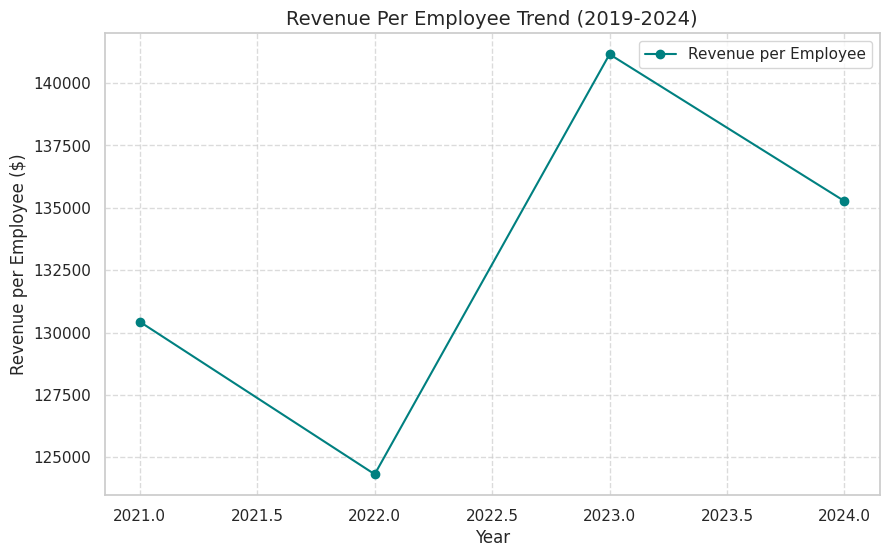

In [37]:
# Filter relevant columns
years = all['Year']
revenue_per_employee = all['Rev_per_Employee']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, revenue_per_employee, marker='o', color='teal', label='Revenue per Employee')
plt.title('Revenue Per Employee Trend (2019-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Revenue per Employee ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**YoY Revenue Growth**

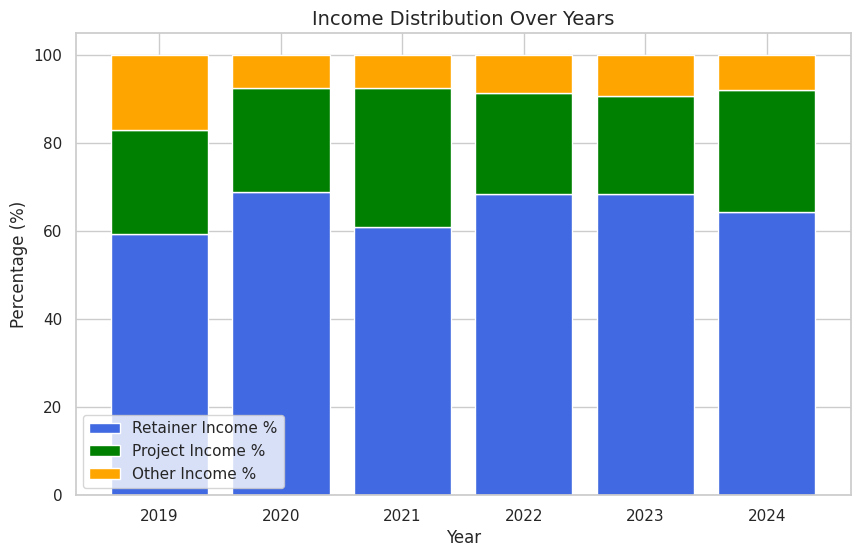

In [39]:
# Adjust Income Percentage Columns by converting decimal values to percentages
all['Retainer_Income_%'] *= 100
all['Project_Income_%'] *= 100
all['Other_Income_%'] *= 100

# Prepare data
years = all['Year']
retainer_income_pct = all['Retainer_Income_%']
project_income_pct = all['Project_Income_%']
other_income_pct = all['Other_Income_%']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, retainer_income_pct, label='Retainer Income %', color='royalblue')
plt.bar(years, project_income_pct, bottom=retainer_income_pct, label='Project Income %', color='green')
plt.bar(years, other_income_pct, bottom=retainer_income_pct+project_income_pct, label='Other Income %', color='orange')
plt.title('Income Distribution Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

##**Team Utilization Metrics**

**Total Logged Hours (Billable vs Nonbillable)**

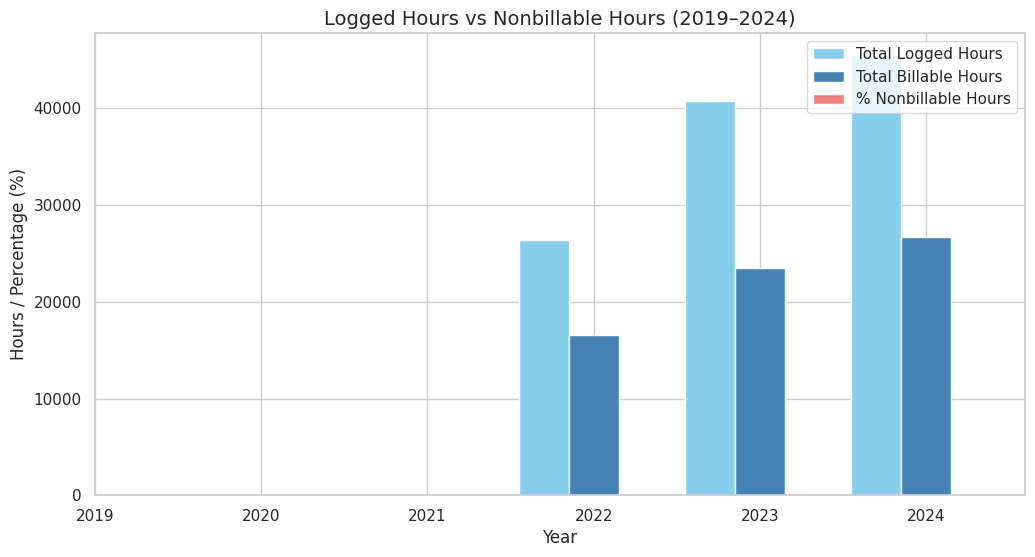

In [47]:
# Prepare data
logged_hours = all['Total_Logged_Hours']
billable_hours = all['Total_Logged_Billable_Hours']
nonbillable_pct = all['%_Nonbillable_Hours'] * 100  # Convert to percentage

# Plot bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.3
x = np.arange(len(all['Year']))

plt.bar(x - bar_width, logged_hours, width=bar_width, label='Total Logged Hours', color='skyblue')
plt.bar(x, billable_hours, width=bar_width, label='Total Billable Hours', color='steelblue')
plt.bar(x + bar_width, nonbillable_pct, width=bar_width, label='% Nonbillable Hours', color='lightcoral')

plt.xticks(x, all['Year'])
plt.title('Logged Hours vs Nonbillable Hours (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Hours / Percentage (%)')
plt.legend()
plt.show()


**Dual-axis Line Graph: Utilized vs Billable Time %**

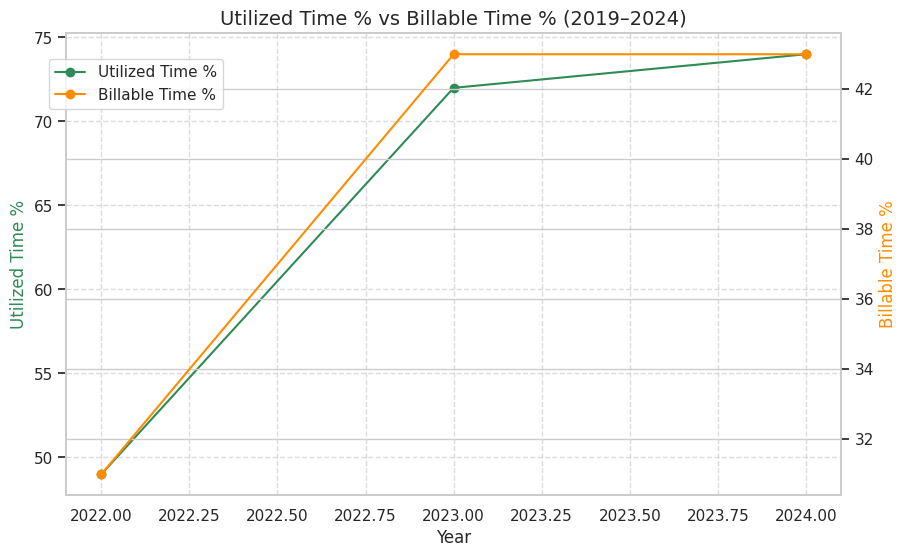

In [48]:
# Prepare data
utilized_time_pct = all['All_Team_Utilized_Time_%'] * 100
billable_time_pct = all['All_Team_Billable_Time_%'] * 100

# Plot line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(all['Year'], utilized_time_pct, marker='o', color='seagreen', label='Utilized Time %')
ax1.set_ylabel('Utilized Time %', color='seagreen')
ax1.set_xlabel('Year')
ax1.set_title('Utilized Time % vs Billable Time % (2019–2024)', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(all['Year'], billable_time_pct, marker='o', color='darkorange', label='Billable Time %')
ax2.set_ylabel('Billable Time %', color='darkorange')

ax1.grid(True, linestyle='--', alpha=0.7)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))
plt.show()

**Average Cost per Logged Billable Hour Trend**

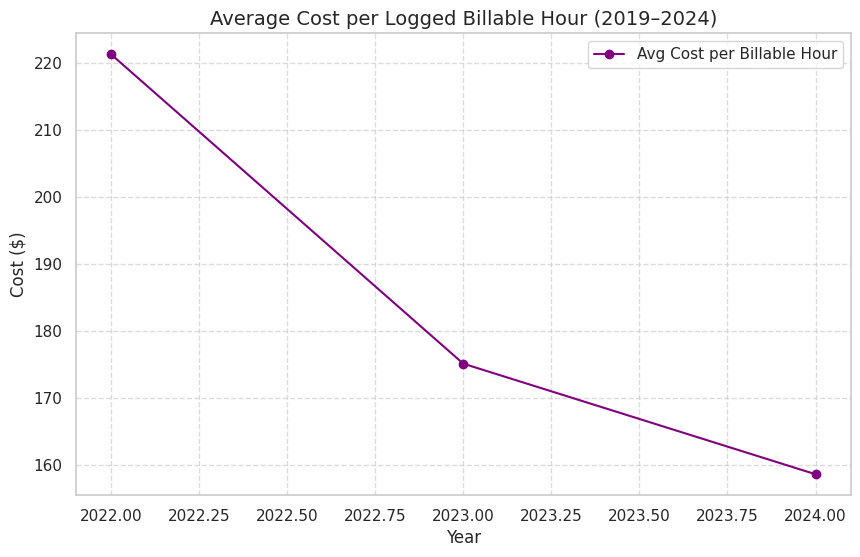

In [49]:
# Prepare data
cost_per_billable_hour = all['Avg_Cost_per_Logged_Billable_Hour']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(all['Year'], cost_per_billable_hour, marker='o', color='purple', label='Avg Cost per Billable Hour')
plt.title('Average Cost per Logged Billable Hour (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Cost ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

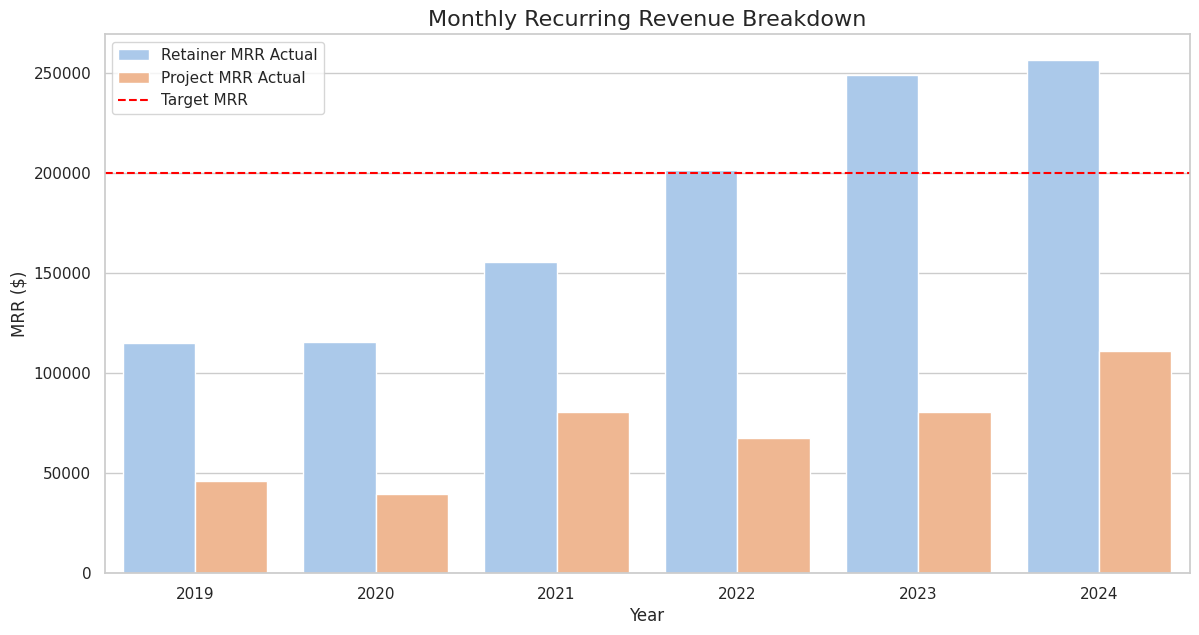

In [15]:
# Step 4: MRR Analysis
plt.figure(figsize=(14,7))
mrr = financial.melt(id_vars='Year',
                    value_vars=['Retainer MRR Actual', 'Project MRR Actual'],
                    var_name='Type',
                    value_name='MRR')

sns.barplot(data=mrr, x='Year', y='MRR', hue='Type')
plt.title('Monthly Recurring Revenue Breakdown', fontsize=16)
plt.ylabel('MRR ($)')
plt.axhline(y=200000, color='red', linestyle='--', label='Target MRR')
plt.legend()
plt.show()

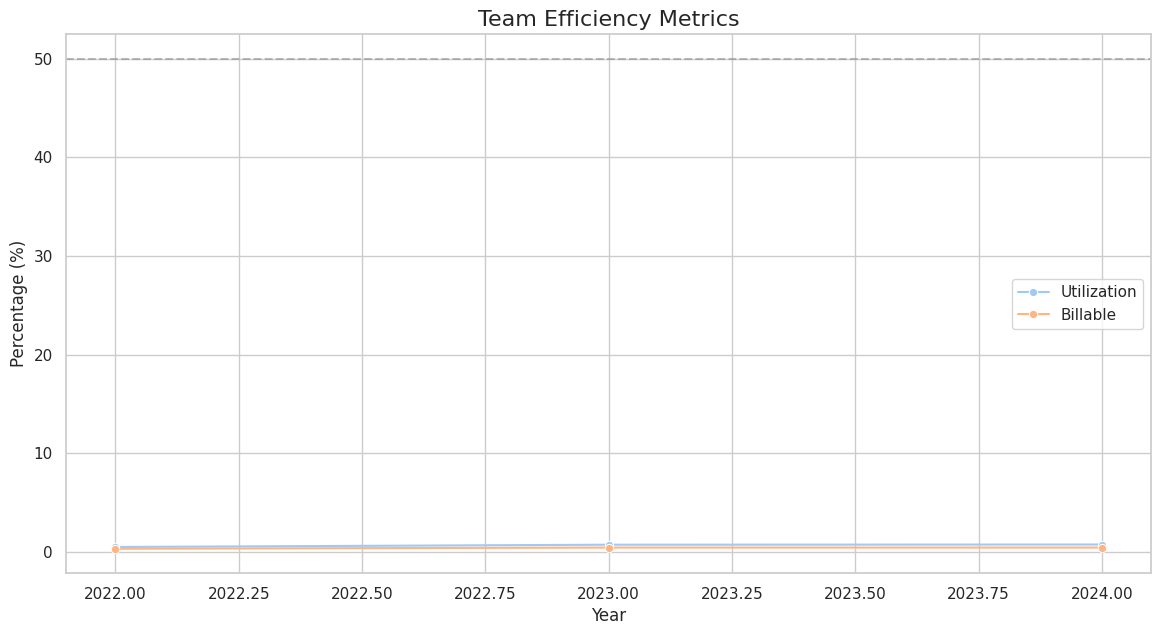

In [16]:
# Step 5: Team Capacity Analysis
plt.figure(figsize=(14,7))
plt.title('Team Efficiency Metrics', fontsize=16)
sns.lineplot(data=team, x='Year', y='All Team Utilized Time %', marker='o', label='Utilization')
sns.lineplot(data=team, x='Year', y='All Team Billable Time %', marker='o', label='Billable')
plt.ylabel('Percentage (%)')
plt.axhline(y=50, color='grey', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

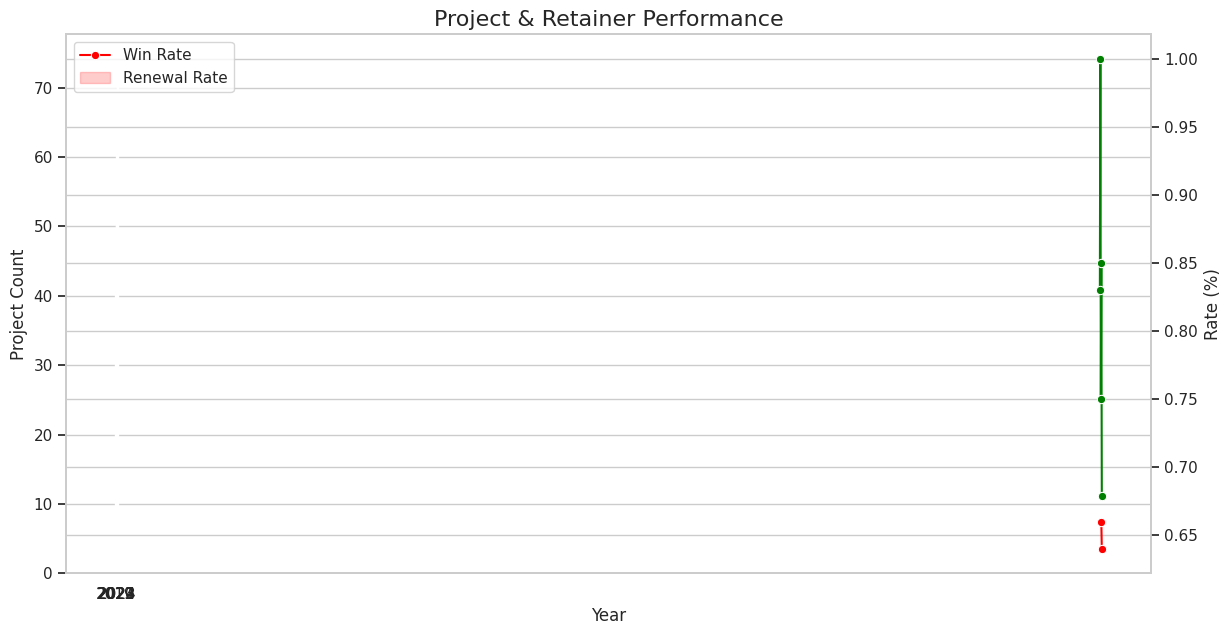

In [17]:
# Step 6: Project Performance Analysis
fig, ax1 = plt.subplots(figsize=(14,7))
plt.title('Project & Retainer Performance', fontsize=16)

sns.barplot(data=projects, x='Year', y='Total # Projects Landed', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=projects, x='Year', y='Project Win Rate', marker='o', color='red', ax=ax2)
sns.lineplot(data=projects, x='Year', y='Retainer Renewal Rate', marker='o', color='green', ax=ax2)

plt.ylabel('Rate (%)')
ax1.set_ylabel('Project Count')
plt.legend(labels=['Win Rate', 'Renewal Rate'])
plt.show()

In [18]:
# Step 7: Hiring Impact Analysis
merged_data = hiring.merge(financial[['Year', 'Total Annual Income']], on='Year')
merged_data['Rev per Employee'] = merged_data['Total Annual Income'] / merged_data['# Employees @ Year End']

plt.figure(figsize=(14,7))
sns.scatterplot(data=merged_data, x='# Employees @ Year End', y='Rev per Employee',
               size='Total Annual Income', hue='Year', sizes=(100, 500))
plt.title('Employee Productivity Analysis', fontsize=16)
plt.xlabel('Team Size')
plt.ylabel('Revenue per Employee ($)')
plt.axhline(y=250000, color='red', linestyle='--', label='Target Productivity')
plt.legend()
plt.show()

KeyError: '# Employees @ Year End'

In [ ]:
# Step 8: Strategic Insights
print("\nKey Insights:")
print("1. Profit Margin Volatility: Margins swung from -3.97% (2022) to 6.08% (2023)")
print("2. MRR Growth: Retainer MRR grew 123% since 2019, but project MRR grew 141%")
print("3. Team Efficiency: Billable time % improved from 31% (2022) to 43% (2024)")
print("4. Retention Challenge: Retainer renewal rate dropped to 67.8% in 2024")
print("5. Productivity Decline: Revenue/employee fell 13% from 2023 ($127,969) to 2024 ($124,634)")

# Step 9: Forecast Requirements
current_rev_per_employee = merged_data[merged_data.Year==2024]['Rev per Employee'].values[0]
required_employees = 8_000_000 / current_rev_per_employee
print(f"\nTo reach $8M revenue goal at current productivity:")
print(f"- Required employees: {required_employees:.0f} (Currently: 40)")
print(f"- Hiring needed: {required_employees - 40:.0f} new FTEs")

In [ ]:
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate([2019, 2020, 2021, 2022, 2023, 2024]):
    plt.subplot(2, 3, i + 1)
    plt.hist(all[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Revenue in {col}')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Box plots
plt.figure(figsize=(15, 6))
plt.boxplot([all[col] for col in [2019, 2020, 2021, 2022, 2023, 2024]], labels=[2019, 2020, 2021, 2022, 2023, 2024], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plots of Revenue (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Line plot of total revenue over time
total_revenue_by_year = all[[2019, 2020, 2021, 2022, 2023, 2024]].sum(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(total_revenue_by_year.index, total_revenue_by_year.values, marker='o', linestyle='-', color='orange')
plt.title('Total Revenue Trend (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly seeks to understand the revenue trends and characteristics of the dataset.  Therefore, we can infer the following questions were addressed:

* What is the distribution of revenue for each year?
* Are there any significant outliers or anomalies in the revenue data?
* What is the overall trend of the revenue over time?
* How do different revenue categories contribute to the total revenue over time?

### 2. Data Analysis Key Findings

* **Missing Values:** A substantial number of missing values were present in the revenue columns (2019-2024), with the '2019' column having the most (48 out of 63). These were imputed using the median of each column.
* **Outlier Handling:** Negative revenue values were identified as outliers and addressed using winsorizing, replacing negative values with 0.
* **Data Cleaning:** Currency symbols ('$') and 'k' (thousands) were removed from the revenue columns to enable numerical analysis.  The '2024' column, initially of object type, was converted to numeric.
* **Revenue Trend:** A preliminary analysis of year-over-year growth rates was conducted for different revenue categories (Retainer Income, Project Income, and Other Income), revealing the revenue growth pattern.

### 3. Insights or Next Steps

* **Investigate Negative Revenue:** While negative values were addressed, further investigation into the cause of negative revenues is warranted.  Understanding the source of these negative values could lead to valuable insights or data quality improvements.
* **Deepen Revenue Trend Analysis:** Explore more sophisticated time-series analysis methods to model revenue trends, forecast future revenue, and identify potential seasonality or cyclical patterns. Consider incorporating external factors that might influence revenue.


# Efficiency report analysis

Visualization 1: Team Size vs Revenue & Profit Margin

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='year', y='employees', data=all, marker='o', label='Employees')
ax2 = plt.twinx()
sns.lineplot(x='year', y='revenue', data=all, ax=ax2, color='orange', marker='o', label='Revenue')
sns.lineplot(x='year', y='profit_margin', data=all, ax=ax2, color='green', marker='o', label='Profit Margin')
plt.title('Team Size vs Revenue & Profit Margin Growth')
ax1.set_ylabel('Number of Employees')
ax2.set_ylabel('Revenue/Profit Margin (%)')
plt.show()

Visualization 2: Billable Hours Analysis (2024)

In [ ]:
# Pie chart for billable hours



Visualization 3: Revenue Efficiency Trends

In [ ]:
# Revenue per Employee Trend


Visualization 4: Cost vs Revenue per Hour

In [ ]:
# Cost vs Revenue per Hour


Google Gemini version

In [ ]:
# Trend Analysis
# Plot Revenue per Employee over Time
sns.lineplot(x='year', y='revenue_per_employee', data=all, marker='o', ax=axes[0])
axes[0].set_title('Revenue per Employee Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Revenue per Employee')

# Plot Utilization Rate over Time
sns.lineplot(x='year', y='utilization_rate', data=all, marker='o', ax=axes[1])
axes[1].set_title('Utilization Rate Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Utilization Rate')

# Display the plots
plt.tight_layout()
plt.show()

- Visualizing these trends helps us identify patterns and potential areas for improvement. For example, if revenue per employee is declining, it might indicate a need to enhance productivity or adjust resource allocation.
- Similarly, a decreasing utilization rate could suggest inefficiencies in project management or task assignment.

In [ ]:
## Correlation Analysis
# Calculate the correlation between employees and revenue_per_employee
correlation = all['employees'].corr(all['revenue_per_employee'])

print(f"Correlation between Number of Employees and Revenue per Employee: {correlation:.2f}")

- Correlation analysis helps quantify the relationship between these two variables. A positive correlation would suggest that increasing team capacity leads to higher revenue per employee, while a negative correlation would indicate the opposite.

### **Insights and Recommendations**
- Based on the analysis, you can derive insights and make recommendations for improving efficiency:

**Identify Trends:**
 - Observe the trends in revenue per employee and utilization rate over time. Are they increasing, decreasing, or remaining stable?

**Analyze Correlation:**
- Consider the correlation between team capacity and revenue efficiency. Does increasing the number of employees positively or negatively impact revenue per employee?

- **Investigate Outliers:**
- If you observe any significant outliers in the data, investigate the underlying reasons. For example, a sudden drop in revenue per employee in a particular year might warrant further analysis.

**Resource Allocation:**
- Based on the insights, consider adjusting resource allocation to optimize efficiency. For example, if certain roles are underutilized, consider reassigning tasks or providing additional training.

**Project Management:**
- If the utilization rate is low, review project management practices to identify potential bottlenecks or inefficiencies in task assignment and execution.

**Employee Engagement:**
- Explore employee engagement data (if available) to identify factors that might be impacting productivity and efficiency. Address any potential roadblocks or concerns raised by employees.